In [23]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords


In [5]:
# Read in Cleaned TV Show data
shows = pd.read_csv('../csv/tv_shows_data_cleaned.csv')
shows.head()

,id,name,original_name,genre_name,number_of_seasons,number_of_episodes,first_air_date,last_air_date,in_production,popularity,...,vote_count,origin_country,original_language,overview,tagline,creator_names,production_names,production_logo_paths,production_origin_countries,poster_path
0,25,Star Wars: Droids,Star Wars: Droids,Kids,1,13.0,1985-09-07,1985-11-30,False,11.592,...,66,"[""CA"",""US""]",en,An animated television series that features th...,NaN,"['George Lucas', 'Ben Burtt', 'Clive A. Smith'...","['Lucasfilm Animation', 'Lucasfilm Ltd.']","['/eDWGeg5tdVNcI8aBaaJ21bEBtFa.png', '/o86Dbpb...","['US', 'US']",/b3gsZSTauRBJDJvWCbD9oVAsFe1.jpg
1,29,"Mary Hartman, Mary Hartman","Mary Hartman, Mary Hartman",Drama,2,307.0,1976-01-05,1977-03-10,False,14.367,...,8,"[""US""]",en,"In the fictional town of Fernwood, Ohio, subur...",NaN,"['Gail Parent', 'Norman Lear', 'Ann Marcus', '...",['TAT Communications Company'],[None],[''],/O1bcYEBW8v7JOMNVpYOBTL6PjL.jpg
2,55,North of 60,North of 60,Drama,6,95.0,1992-12-03,2005-01-30,False,5.742,...,42,"[""CA""]",en,North of 60 is a mid-1990s Canadian television...,NaN,NaN,NaN,NaN,NaN,/twsoO8NCTitfW4My9wKz2p5yJou.jpg
3,59,The European Side,Avrupa Yakası,Family,6,191.0,2004-02-11,2009-06-24,False,7.568,...,43,"[""TR""]",tr,The life and times of rather traditional Sutcu...,NaN,['Gülse Birsel'],['Plato Film Production'],['/XqfGZYm5Vk8rHEKkgx91XD3Ooy.png'],['TR'],/4JSQb4uFPNLunGsS9FjY9wYhOj.jpg
4,65,The Job,The Job,Drama,2,19.0,2001-03-14,2002-04-24,False,6.335,...,53,"[""US""]",en,Mike McNeil is a decorated New York City detec...,NaN,"['Denis Leary', 'Peter Tolan']","['The Cloudland Company', 'Apostle', 'Touchsto...","[None, None, '/wwaKUcOENHix2jxLfFBfNkCtOEQ.png...","['US', 'US', 'US', 'US']",/iDiiIBZCjdihpBoDKzVRhb7C9B.jpg


In [6]:
# View datafram description
shows.describe()

,id,number_of_seasons,number_of_episodes,popularity,vote_average,vote_count
count,8421.000000,8421.000000,8420.000000,8421.000000,8421.000000,8421.000000
mean,69218.841705,3.030044,68.168290,16.056712,7.136508,116.720698
std,53088.012187,5.228819,285.915877,38.569410,1.052547,577.350098
min,9.000000,1.000000,0.000000,0.600000,1.400000,5.000000
25%,22002.000000,1.000000,8.000000,3.770000,6.600000,7.000000
50%,66888.000000,1.000000,18.000000,7.265000,7.250000,15.000000
75%,96102.000000,3.000000,50.000000,14.985000,7.827000,46.000000
max,225008.000000,79.000000,8903.000000,1075.970000,10.000000,21048.000000


In [7]:
# View the dataframe data types
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8421 non-null   int64  
 1   name                         8421 non-null   object 
 2   original_name                8421 non-null   object 
 3   genre_name                   8293 non-null   object 
 4   number_of_seasons            8421 non-null   int64  
 5   number_of_episodes           8420 non-null   float64
 6   first_air_date               8410 non-null   object 
 7   last_air_date                8419 non-null   object 
 8   in_production                8421 non-null   bool   
 9   popularity                   8421 non-null   float64
 10  vote_average                 8421 non-null   float64
 11  vote_count                   8421 non-null   int64  
 12  origin_country               8421 non-null   object 
 13  original_language 

In [10]:
# Drop rows with null genre_name
shows.dropna(subset=['genre_name'], inplace=True)
shows.dropna(subset=['overview'], inplace=True)

In [11]:
# View the dataframe data types
shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8090 entries, 0 to 8420
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8090 non-null   int64  
 1   name                         8090 non-null   object 
 2   original_name                8090 non-null   object 
 3   genre_name                   8090 non-null   object 
 4   number_of_seasons            8090 non-null   int64  
 5   number_of_episodes           8089 non-null   float64
 6   first_air_date               8081 non-null   object 
 7   last_air_date                8089 non-null   object 
 8   in_production                8090 non-null   bool   
 9   popularity                   8090 non-null   float64
 10  vote_average                 8090 non-null   float64
 11  vote_count                   8090 non-null   int64  
 12  origin_country               8090 non-null   object 
 13  original_language 

In [77]:
# Change genre column to string
# shows['genre_name'] = shows['genre_name'].astype(str)

In [40]:
# Print out unique genres
unique_values = shows['genre_name'].unique()
print(unique_values)

['Kids' 'Drama' 'Family' 'News' 'Comedy' 'Crime' 'Animation'
 'Action & Adventure' 'Sci-Fi & Fantasy' 'Reality' 'Western' 'Documentary'
 'Mystery' 'Talk' 'Soap' 'War & Politics' 'Romance' 'History']


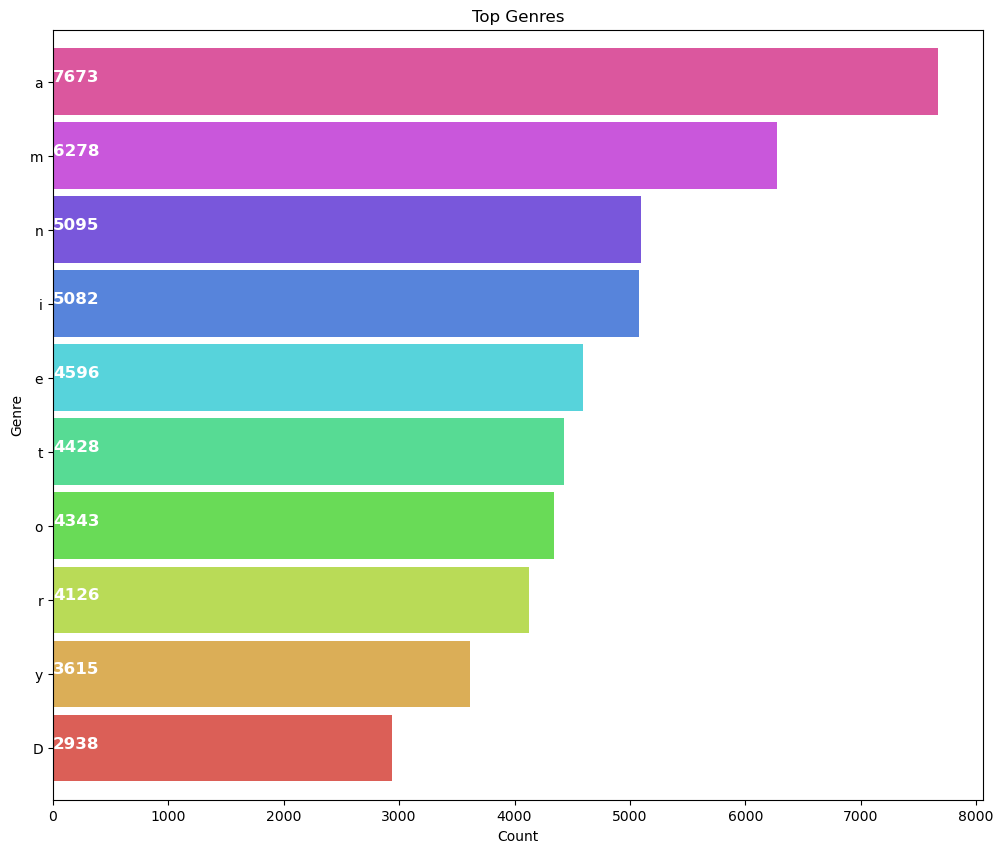

In [13]:
# Plot the genres in terms of their occurrence to get an insight into TV genres popularity

plt.subplots(figsize=(12,10))
list_genres = []
for i in shows['genre_name']:
    list_genres.extend(i)
ax = pd.Series(list_genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,
                                                                                color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list_genres).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')

plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Genres')
plt.show()

In [38]:
list_genres

['K',
 'i',
 'd',
 's',
 'D',
 'r',
 'a',
 'm',
 'a',
 'D',
 'r',
 'a',
 'm',
 'a',
 'F',
 'a',
 'm',
 'i',
 'l',
 'y',
 'D',
 'r',
 'a',
 'm',
 'a',
 'N',
 'e',
 'w',
 's',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'C',
 'r',
 'i',
 'm',
 'e',
 'A',
 'n',
 'i',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'A',
 'c',
 't',
 'i',
 'o',
 'n',
 ' ',
 '&',
 ' ',
 'A',
 'd',
 'v',
 'e',
 'n',
 't',
 'u',
 'r',
 'e',
 'D',
 'r',
 'a',
 'm',
 'a',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'S',
 'c',
 'i',
 '-',
 'F',
 'i',
 ' ',
 '&',
 ' ',
 'F',
 'a',
 'n',
 't',
 'a',
 's',
 'y',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'R',
 'e',
 'a',
 'l',
 'i',
 't',
 'y',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'W',
 'e',
 's',
 't',
 'e',
 'r',
 'n',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'A',
 'n',
 'i',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 'C',
 'o',
 'm',
 'e',
 'd',
 'y',
 'D',
 'r'

In [15]:
# Create a list with unique genres
genreList = []
for index, row in shows.iterrows():
    genres = row["genre_name"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['K', 'i', 'd', 's', 'D', 'r', 'a', 'm', 'F', 'l']

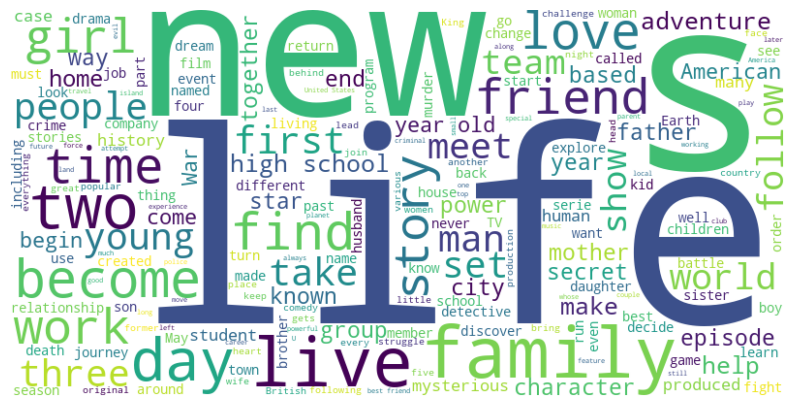

In [35]:


# Preprocess the text data and remove English stopwords and specific words
stop_words = set(stopwords.words('english'))  # Set of English stopwords
stop_words.update(['series', 'show', 'episode', 'one', 's', 'S', 'world'])  # Add specific words to exclude
shows['overview'] = shows['overview'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Prepare the text data for the word cloud
text_data = ' '.join(shows['overview'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

